In [2]:
import pandas as pd
import numpy as np
Inputs = pd.read_csv('4din.csv')

Outputs = pd.read_csv('vecs.csv')
nInputs = pd.read_csv('n4din.csv')
#FA = pd.read_csv('4dFA.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
import joblib 


scaler = StandardScaler()



x_train = scaler.fit_transform(Inputs)
#x_test = scaler.transform(TestInputs)
joblib.dump(scaler, 'vecscaler.gz') 

['vecscaler.gz']

In [4]:
import tensorflow as tf

def cosine_distance(y_true, y_pred):
    y_true = tf.nn.l2_normalize(y_true, axis=-1)
    y_pred = tf.nn.l2_normalize(y_pred, axis=-1)
    return 1 - tf.abs(tf.reduce_sum(y_true * y_pred, axis=-1))

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(12,)),  # 12 input features, 4 vectors each with x, y, z
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(3)  # 3 output features, theta and phi, x y z
])

model.compile(optimizer='adam', loss=cosine_distance)

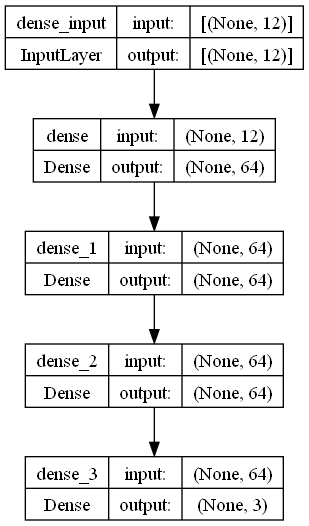

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

In [6]:
history = model.fit(x_train, Outputs, epochs=16)
model.save('vecmodel.h5')

Epoch 1/16

437500/437500 [==============================] - 869s 2ms/step - loss: 0.0710
Epoch 2/16
437500/437500 [==============================] - 765s 2ms/step - loss: 0.0552
Epoch 3/16
437500/437500 [==============================] - 735s 2ms/step - loss: 0.0514
Epoch 4/16
437500/437500 [==============================] - 696s 2ms/step - loss: 0.0492
Epoch 5/16
437500/437500 [==============================] - 699s 2ms/step - loss: 0.0486
Epoch 6/16
437500/437500 [==============================] - 703s 2ms/step - loss: 0.0471
Epoch 7/16
437500/437500 [==============================] - 697s 2ms/step - loss: 0.0455
Epoch 8/16
437500/437500 [==============================] - 707s 2ms/step - loss: 0.0454
Epoch 9/16
437500/437500 [==============================] - 678s 2ms/step - loss: 0.0447
Epoch 10/16
437500/437500 [==============================] - 675s 2ms/step - loss: 0.0448
Epoch 11/16
437500/437500 [==============================] - 677s 2ms/step - loss: 0.0449
Epoch 12/16
437500

c:\Users\c22116156\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
model.save('vecmodel.keras')